In [ ]:
#Dependencias
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
#%matplotly notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [ ]:
def gen_data(n,h,sd1,sd2):
  """
    Generate new and random data.

    sd: standar desviation.
    n: how many data generate.
    h: location for rvs (en la grafica se ve que es una posicion dominante en x)
  """
  x1= ss.norm.rvs(-h,sd1,n)
  y1= ss.norm.rvs(0,sd1,n)
  x2= ss.norm.rvs(h,sd2,n)
  y2= ss.norm.rvs(0,sd2,n)
  return (x1,y1,x2,y2)

In [ ]:
def plot_data(x1,y1,x2,y2):
  plt.figure()
  plt.plot(x1,y1,"o", ms=2)
  plt.plot(x2,y2,"o", ms=2)
  plt.xlabel("$X$")
  plt.ylabel("$Y$")

## 5.2.1: Generating Example Classification Data

In this video, you will...

>        Learn how to generate and plot classification data in Python


In [ ]:
def gen_data(n,h,sd1,sd2):
  """
    Generate new and random data.

    sd: standar desviation.
    n: how many data generate.
    h: location for rvs (en la grafica se ve que es una posicion dominante en x)
  """
  x1= ss.norm.rvs(-h,sd1,n)
  y1= ss.norm.rvs(0,sd1,n)
  x2= ss.norm.rvs(h,sd2,n)
  y2= ss.norm.rvs(0,sd2,n)
  return (x1,y1,x2,y2)

In [ ]:
(x1,y1,x2,y2)=gen_data(50,1,1,1.5)

In [ ]:
(x1,y1,x2,y2)=gen_data(1000,1.5,1,1.5)

In [ ]:
def plot_data(x1,y1,x2,y2):
  plt.figure()
  plt.plot(x1,y1,"o", ms=2)
  plt.plot(x2,y2,"o", ms=2)
  plt.xlabel("$X$")
  plt.ylabel("$Y$")


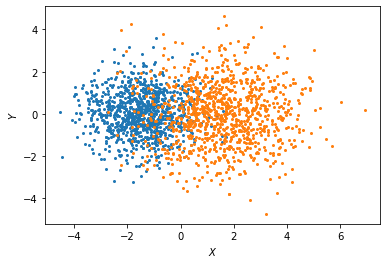

In [ ]:
plot_data(x1,y1,x2,y2)

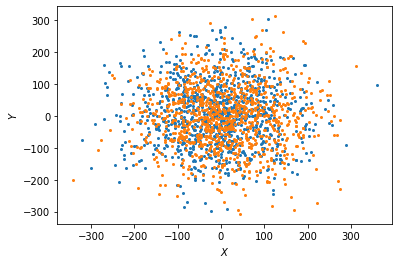

In [ ]:
(x1,y1,x2,y2)=gen_data(1000,10,100,100)
plot_data(x1,y1,x2,y2)

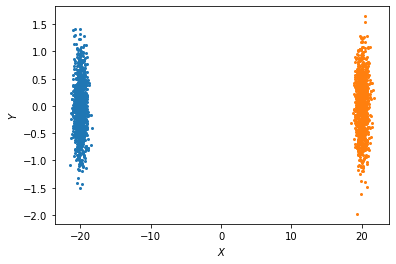

In [ ]:
(x1,y1,x2,y2)=gen_data(1000,20,0.5,0.5)
plot_data(x1,y1,x2,y2)

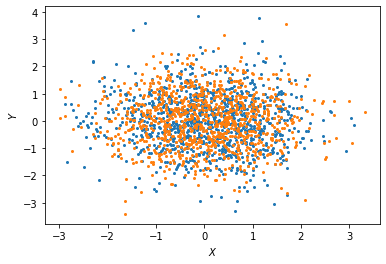

In [ ]:
(x1,y1,x2,y2)=gen_data(1000,0,1,1)
plot_data(x1,y1,x2,y2)

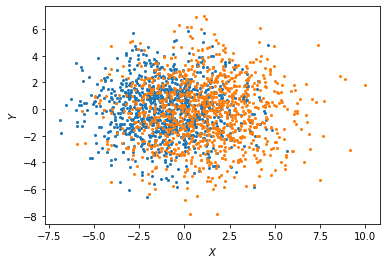

In [ ]:
(x1,y1,x2,y2)=gen_data(1000,1,2,2.5)
plot_data(x1,y1,x2,y2)

## 5.2.2: Logistic Regression

In this video, you will...

>        Learn the basics of logistic regression


###Logistic Regression, Question 2 

The following code creates a function that converts probability to odds:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

Assume that there are only two classes and all data points belong to one of these two classes. The probability that a given data point belongs to Class 1 is 0.2.
What are the odds that a given data point belongs to Class 2 as given by the function above?


In [ ]:
#no entendi por que la repuesta es 4

In [ ]:
 def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p) 

In [ ]:
prob_to_odds(0.8)

4.000000000000001

###Logistic Regression, Question 1 

>What is one of the problems with using linear regression to predict probabilities?


i solved it readed this post https://towardsdatascience.com/why-linear-regression-is-not-suitable-for-binary-classification-c64457be8e28

##5.2.3: Logistic Regression in Code

In this video, you will...

>        Learn how to use the scikit-learn library to perform logistic regression


In [ ]:
n=1000
(x1,y1,x2,y2)=gen_data(n,1.5,1,1.5)
clf=LogisticRegression()

In [ ]:
pt1= np.stack((x1,y1)).T
pt1v= np.vstack((x1,y1)).T
pt2= np.stack((x2,y2)).T

In [ ]:
#vstack agrupa (stack=apilar) los array de una forma en especifico
X=np.vstack((pt1,pt2))
X

array([[-1.65849488, -0.06206243],
       [-1.45369081,  0.04893698],
       [-2.52561348,  0.21633651],
       ...,
       [ 2.38993201,  0.51883921],
       [ 0.23003554,  1.71378343],
       [ 1.75763757, -0.00338753]])

In [ ]:
#presentacion de las clases 1 y las clases 2
y=np.hstack((np.repeat(1,n),np.repeat(2,n)))
y.shape

(2000,)

In [ ]:
#Como que toma la mitad de los datos (train_size=0.5) para generar los datos de ENTRENAMIENTO Y DE PRUEBA
X_train,X_test,Y_train,Y_test= train_test_split(X,y,train_size=0.5,random_state=1)
X_train.shape,X_test.shape

((1000, 2), (1000, 2))

In [ ]:
#aplicamos el clasificador
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
clf.score(X_test,Y_test)

0.901

In [ ]:
#calcula la probabilidad de que el punto -2 este en las clacificaciones clase 1 y clase 2

clf.predict_proba(np.array([-2,0]).reshape(1,-1))


array([[0.97980517, 0.02019483]])

In [ ]:
#indica a que clase pertenece
clf.predict(np.array([-2,0]).reshape(1,-1))


array([1])

##5.2.4: Computing Predictive Probabilities Across the Grid

In this video, you will...

>        Learn how to use meshgrid and ravel to compute predictive probabilities

>        Learn how to plot the predictive probabilities


In [ ]:
#genera datos para hacer meshgrid
xx1,xx2=np.meshgrid(np.arange(-5,5,0.1),np.arange(-5,5,0.1))

In [ ]:
xx1

array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       ...,
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]])

In [ ]:
xx2

array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
       [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
       [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
       ...,
       [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
       [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
       [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]])

In [ ]:
#Aparentemente ravel(),ente toma todos los datos de una matriz y los coloca de manera ordenada en un vector (array de una fila)
ravel1=xx1.ravel()
ravel2=xx2.ravel()
ravel1

array([-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9])

In [ ]:
#ordenamos los ravels como valores de varios puntos siendo ravel 1 our "x" and ravel 2 our "y"
ravel_data=np.stack((ravel1,ravel2),axis=1)
ravel_data.shape

(10000, 2)

In [ ]:
#probamos our model with the ravel_data para ver es que clase caen
probs=clf.predict_proba(ravel_data)
probs.shape

(10000, 2)

In [ ]:
#class_no simplemente indica en que columna nos fijamos
class_no=0
Z = probs[:,class_no]
Z0 = probs[:]
Z.shape,Z0.shape

((10000,), (10000, 2))

In [ ]:
#reoganizamos los datos para que queden ordenados es 10col and 10 row
Z=Z.reshape(xx1.shape)
Z

array([[5.67528109e-05, 7.00278630e-05, 8.64078147e-05, ...,
        9.99975401e-01, 9.99980064e-01, 9.99983844e-01],
       [5.62879964e-05, 6.94543312e-05, 8.57001418e-05, ...,
        9.99975198e-01, 9.99979900e-01, 9.99983710e-01],
       [5.58269885e-05, 6.88854964e-05, 8.49982642e-05, ...,
        9.99974993e-01, 9.99979734e-01, 9.99983576e-01],
       ...,
       [2.55586218e-05, 3.15372702e-05, 3.89143837e-05, ...,
        9.99945378e-01, 9.99955733e-01, 9.99964124e-01],
       [2.53492862e-05, 3.12789684e-05, 3.85956631e-05, ...,
        9.99944927e-01, 9.99955367e-01, 9.99963828e-01],
       [2.51416650e-05, 3.10227823e-05, 3.82795528e-05, ...,
        9.99944472e-01, 9.99954998e-01, 9.99963529e-01]])

In [ ]:
la_dta=np.arange(0,100,1)
la_dta.reshape(xx1.shape)

ValueError: ignored

Text(0.5, 1.0, 'class1')

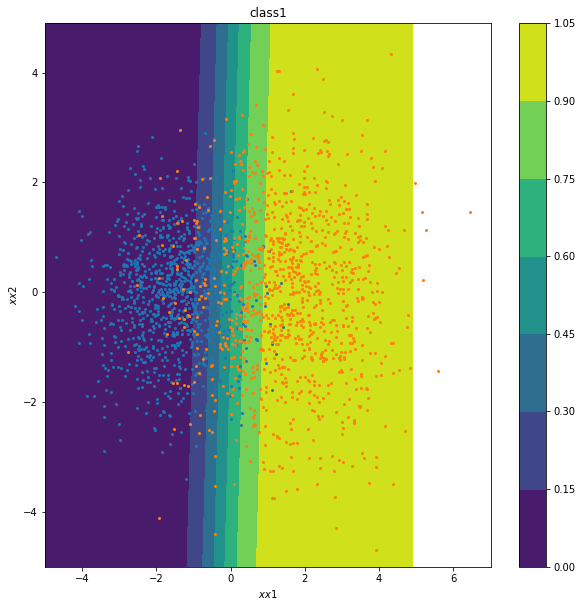

In [ ]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

#Debo revisar el contourf
CS=ax.contourf(xx1,xx2,Z)

#los datos
plt.plot(x1,y1,"o", ms=2)
plt.plot(x2,y2,"o", ms=2)

cbar=plt.colorbar(CS)

plt.xlabel("$xx1$")
plt.ylabel("$xx2$")
plt.title("class1")


Text(0.5, 1.0, 'class2')

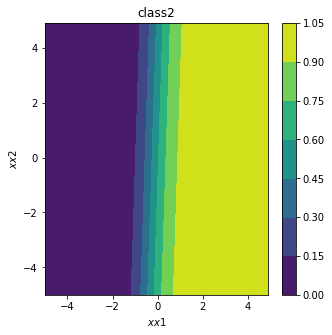

In [ ]:
class_no=1
Z = probs[:,class_no]
Z=Z.reshape(xx1.shape)
plt.figure(figsize=(5,5))
ax=plt.subplot(111)

#Debo revisar el contourf
CS=ax.contourf(xx1,xx2,Z)

cbar=plt.colorbar(CS)

plt.xlabel("$xx1$")
plt.ylabel("$xx2$")
plt.title("class2")

In [ ]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

Text(0.5, 1.0, 'Pred. prob for class 2')

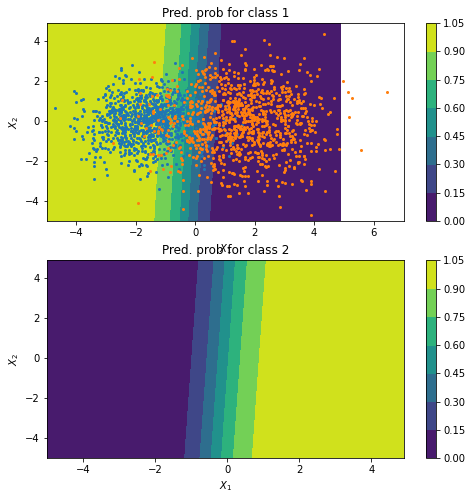

In [ ]:
plt.figure(figsize=(8,8))
ax = plt.subplot(211)
plt.plot(x1,y1,"o", ms=2)
plt.plot(x2,y2,"o", ms=2)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")

ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2")